In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from scipy import stats
plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
#matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


activity = ["eat", 'wipe', 'type', 'write', 'fold', 'peg']


In [26]:
df = pd.read_csv(os.path.join(os.getcwd(),'data/task_table.csv'), delim_whitespace=False)
df

,Task,Angle,Acceleration,Subject
0,eat,3799.100135,3147.482460,1.0
1,wipe,7330.513663,23807.499260,1.0
2,type,3412.228866,7601.213170,1.0
3,write,8036.648078,4727.532735,1.0
4,fold,17544.984280,16363.654130,1.0
5,peg,25097.180040,15754.965690,1.0
6,eat,2829.078040,5167.101301,2.0
7,wipe,899.665578,6710.688226,2.0
8,type,2825.275456,5939.070548,2.0
9,write,241.269559,6564.249648,2.0


In [27]:
df2 = pd.pivot_table(df,
                     index=['Subject'], 
                     columns=['Task'])
df2

Acceleration                                                         \
Task             eat         fold           peg          type          wipe   
Subject                                                                       
1.0      3147.482460  16363.65413  15754.965690   7601.213170  23807.499260   
2.0      5167.101301  16417.92670  14841.394510   5939.070548   6710.688226   
3.0      3644.474787  11071.11086   9995.998122   4711.386534   6672.316353   
4.0      3849.874404  16324.66329  16691.469240   7599.444264  12760.478340   
5.0      6121.833482  20576.31245  12841.482250  14766.024590  13348.945250   
6.0      3804.430451  15768.15951  12158.686830  13323.454670  10226.677450   
7.0      4831.890932  23350.74427  16360.290970  11115.500300  12103.845720   
8.0      4843.467866  12859.24801  15497.823380   5577.161877  10480.253820   

                             Angle                                           \
Task            write          eat         fold           peg          type   
Subject                                                                       
1.0       4727.532735  3799.100135  17544.98428  25097.180040   3412.228866   
2.0       6564.249648  2829.078040  28396.12371  24970.024750   2825.275456   
3.0       5538.247938  2551.106924  18637.90945  21200.681390  16314.529490   
4.0       7502.223003  2388.083701  54135.93907  31405.569270  11766.573050   
5.0       6942.076258  3312.539097  33080.95934  21300.125060   6786.216135   
6.0       7297.853262  2585.117334  14366.26822  11929.165150  27568.523510   
7.0      10238.933660  2556.634592  16712.38997   8675.973596   8322.013003   
8.0       7419.761542  5802.496499  16170.08401  17664.321790   3950.922609   

                                     
Task             wipe         write  
Subject                              
1.0       7330.513663   8036.648078  
2.0        899.665578    241.269559  
3.0        153.878291   5852.985366  
4.0       1638.407079  10508.232010  
5.0      11728.859820   3727.240858  
6.0       3060.460541   4381.349916  
7.0        978.632689   2824.300759  
8.0       1985.340608   5425.006346

In [28]:
acceleration = df2.Acceleration
angle = df2.Angle

In [29]:
for act in activity:
    print("Acceleration",acceleration[act],"\n\nAngle",angle[act],"\n")

Acceleration Subject
1.0    3147.482460
2.0    5167.101301
3.0    3644.474787
4.0    3849.874404
5.0    6121.833482
6.0    3804.430451
7.0    4831.890932
8.0    4843.467866
Name: eat, dtype: float64 

Angle Subject
1.0    3799.100135
2.0    2829.078040
3.0    2551.106924
4.0    2388.083701
5.0    3312.539097
6.0    2585.117334
7.0    2556.634592
8.0    5802.496499
Name: eat, dtype: float64 

Acceleration Subject
1.0    23807.499260
2.0     6710.688226
3.0     6672.316353
4.0    12760.478340
5.0    13348.945250
6.0    10226.677450
7.0    12103.845720
8.0    10480.253820
Name: wipe, dtype: float64 

Angle Subject
1.0     7330.513663
2.0      899.665578
3.0      153.878291
4.0     1638.407079
5.0    11728.859820
6.0     3060.460541
7.0      978.632689
8.0     1985.340608
Name: wipe, dtype: float64 

Acceleration Subject
1.0     7601.213170
2.0     5939.070548
3.0     4711.386534
4.0     7599.444264
5.0    14766.024590
6.0    13323.454670
7.0    11115.500300
8.0     5577.161877
Name: type,

In [30]:
df.groupby("Task").describe()

Acceleration                                                         \
             count          mean          std           min           25%   
Task                                                                        
eat            8.0   4426.319460   980.361927   3147.482460   3764.441535   
fold           8.0  16591.477403  3906.069405  11071.110860  15040.931635   
peg            8.0  14267.763874  2361.517459   9995.998122  12670.783395   
type           8.0   8829.156994  3771.635096   4711.386534   5848.593380   
wipe           8.0  12013.838052  5393.641823   6672.316353   9347.680144   
write          8.0   7028.859756  1625.477184   4727.532735   6307.749220   

                                                Angle               ...   \
                50%           75%           max count          mean ...    
Task                                                                ...    
eat     4340.882668   4924.376225   6121.833482   8.0   3228.019540 ...    
fold   16344.158710  17457.523138  23350.744270   8.0  24880.582256 ...    
peg    15169.608945  15906.297010  16691.469240   8.0  20280.380131 ...    
type    7600.328717  11667.488892  14766.024590   8.0  10118.285265 ...    
wipe   11292.049770  12907.595068  23807.499260   8.0   3471.969784 ...    
write   7119.964760   7440.376907  10238.933660   8.0   5124.629112 ...    

                                  Subject                                      \
                75%           max   count mean      std  min   25%  50%   75%   
Task                                                                            
eat     3434.179356   5802.496499     8.0  4.5  2.44949  1.0  2.75  4.5  6.25   
fold   29567.332618  54135.939070     8.0  4.5  2.44949  1.0  2.75  4.5  6.25   
peg    25001.813573  31405.569270     8.0  4.5  2.44949  1.0  2.75  4.5  6.25   
type   12903.562160  27568.523510     8.0  4.5  2.44949  1.0  2.75  4.5  6.25   
wipe    4127.973821  11728.859820     8.0  4.5  2.44949  1.0  2.75  4.5  6.25   
write   6398.901044  10508.232010     8.0  4.5  2.44949  1.0  2.75  4.5  6.25   

            
       max  
Task        
eat    8.0  
fold   8.0  
peg    8.0  
type   8.0  
wipe   8.0  
write  8.0  

[6 rows x 24 columns]

Task
eat      Axes(0.125,0.125;0.775x0.755)
fold     Axes(0.125,0.125;0.775x0.755)
peg      Axes(0.125,0.125;0.775x0.755)
type     Axes(0.125,0.125;0.775x0.755)
wipe     Axes(0.125,0.125;0.775x0.755)
write    Axes(0.125,0.125;0.775x0.755)
Name: Acceleration, dtype: object

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


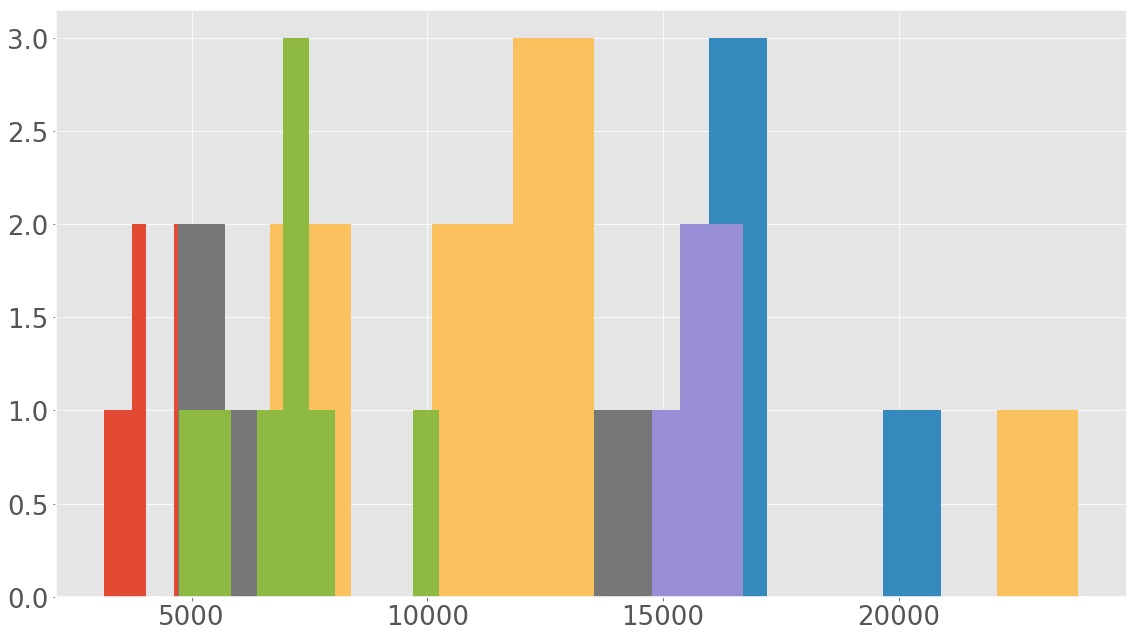

In [77]:
df.groupby("Task").Acceleration.hist()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


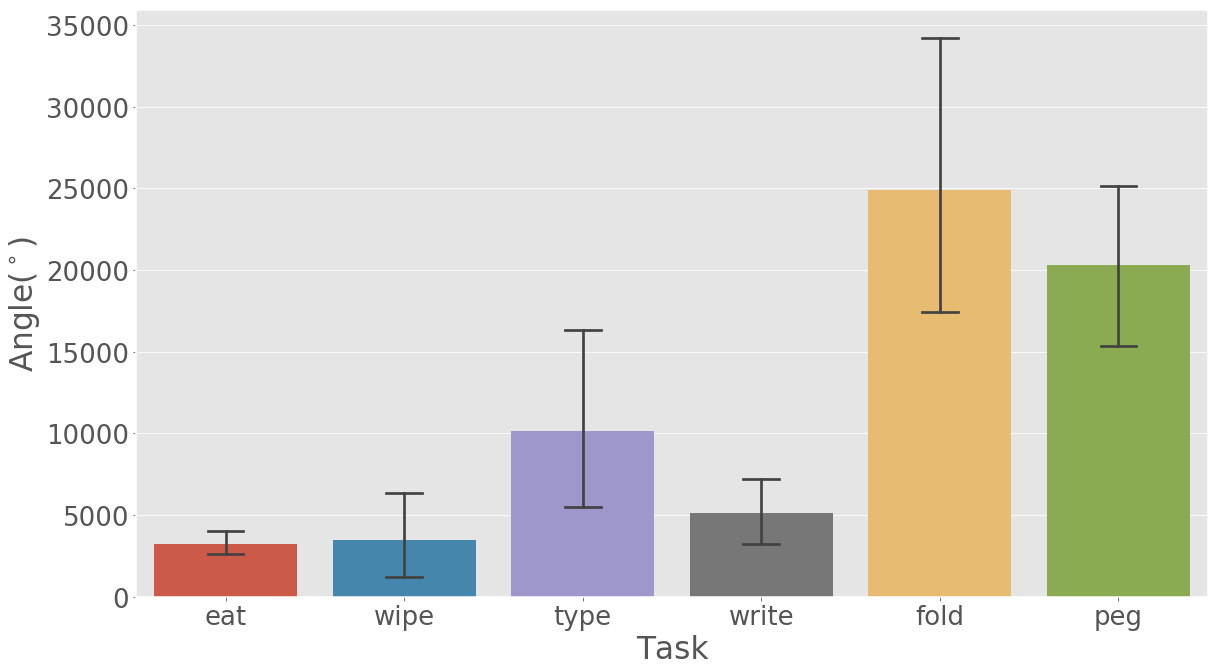

In [117]:
ax = sns.barplot(x="Task", y="Angle", data=df,capsize=.2)
plt.ylabel("Angle$(^\circ)$")


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


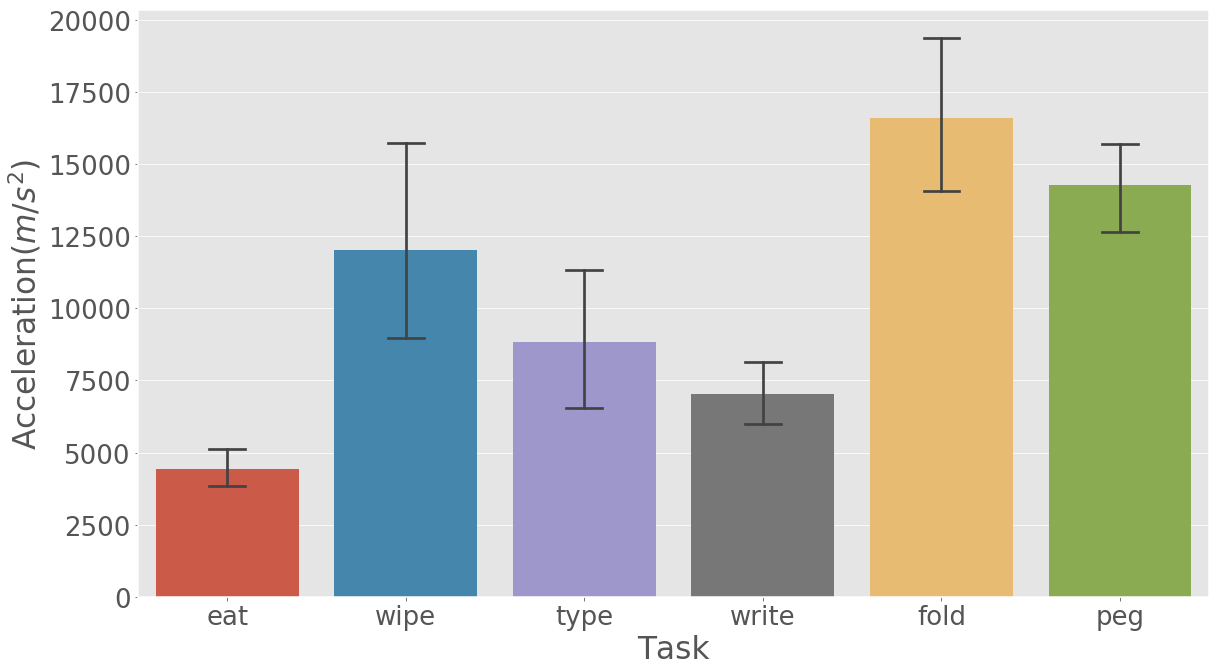

In [32]:
ax = sns.barplot(x="Task", y="Acceleration", data=df,capsize=.2)
plt.ylabel("Acceleration$(m/s^2)$")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


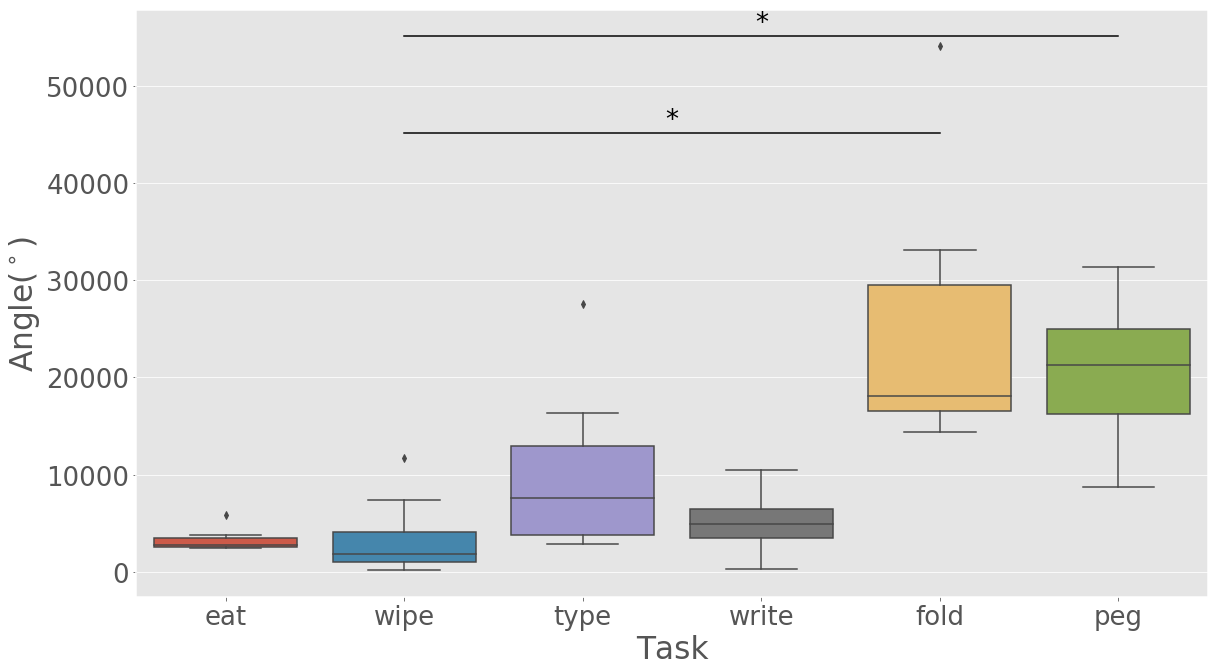

In [118]:
ax = sns.boxplot(x="Task", y="Angle", data=df)
#ax = sns.swarmplot(x="Task", y="Angle", data=df, color=".25")
x1, x2, x3 = 1, 4, 5   
y, col = df['Angle'].max()+1000 , 'k'

plt.plot([x1, x1, x3, x3], [y, y, y, y], lw=1.5, c=col)
plt.text((x1+x3)*.5, y, "*", ha='center', va='bottom', color=col)

y = y - 10000
plt.plot([x1, x1, x2, x2], [y, y, y, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y, "*", ha='center', va='bottom', color=col)


plt.ylabel("Angle$(^\circ)$")

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


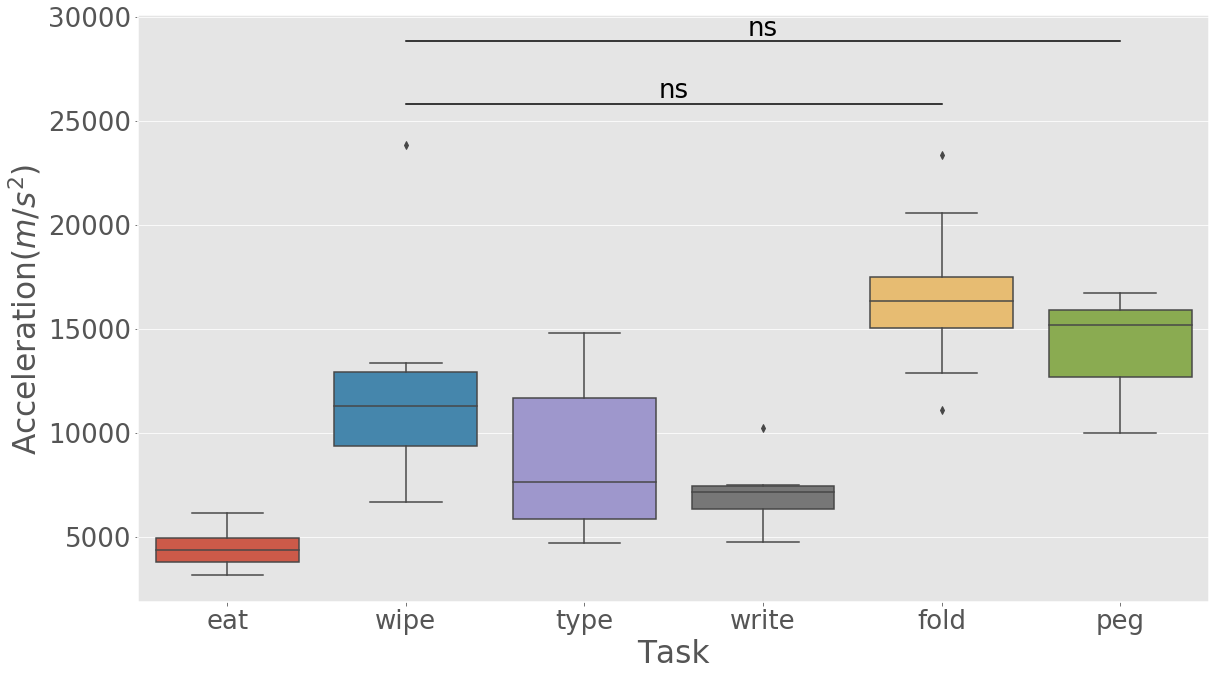

In [115]:
ax = sns.boxplot(x="Task", y="Acceleration", data=df)
#ax = sns.swarmplot(x="Task", y="Acceleration", data=df, color=".25")

x1, x2, x3 = 1, 4, 5   
y,  col = df['Acceleration'].max()+5000 ,'k'

plt.plot([x1, x1, x3, x3], [y, y, y, y], lw=1.5, c=col)
plt.text((x1+x3)*.5, y, "ns", ha='center', va='bottom', color=col)

y = y - 3000
plt.plot([x1, x1, x2, x2], [y, y, y, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y, "ns", ha='center', va='bottom', color=col)

plt.ylabel("Acceleration$(m/s^2)$")

In [35]:
df.describe()
df.corr()

,Angle,Acceleration,Subject
Angle,1.000000,0.594175,-0.096944
Acceleration,0.594175,1.000000,0.070685
Subject,-0.096944,0.070685,1.000000


In [36]:
#正規性の検定 p=0.05以上で正規分布
for act in activity:
    print(act,":",stats.shapiro(acceleration[act]))


eat : (0.9429270625114441, 0.6400904655456543)
wipe : (0.8302713632583618, 0.05975425988435745)
type : (0.8949981927871704, 0.26026451587677)
write : (0.9203790426254272, 0.43294668197631836)
fold : (0.9338521361351013, 0.5517775416374207)
peg : (0.9000129699707031, 0.2890360951423645)


In [37]:
#正規性の検定 p=0.05以上で正規分布
for act in activity:
    print(act,":",stats.shapiro(angle[act]))


eat : (0.7428277730941772, 0.006802726071327925)
wipe : (0.7880260944366455, 0.021280689164996147)
type : (0.8476530909538269, 0.09018564224243164)
write : (0.9860847592353821, 0.9865856766700745)
fold : (0.7753134369850159, 0.015490071848034859)
peg : (0.9650540351867676, 0.8566263914108276)


In [38]:
#等分散の検定 p=0.05以上で等分散
stats.bartlett(acceleration.eat,
               acceleration.wipe,
               acceleration.type,
               acceleration.write,
               acceleration.fold,
               acceleration.peg)

BartlettResult(statistic=20.847563357049633, pvalue=0.0008655698051220315)

In [39]:
#等分散の検定 p=0.05以上で等分散
stats.bartlett(angle.eat,
               angle.wipe,
               angle.type,
               angle.write,
               angle.fold,
               angle.peg)

BartlettResult(statistic=35.378008520766045, pvalue=1.2646329398138382e-06)

In [40]:
#外れ値の検定
from outliers import smirnov_grubbs as grubbs
for act in activity:
    #両側検定，外れ値以外を出力する
    #print(act,":\n",grubbs.test(df[act], alpha=0.05),"\n")
    
    #片側検定,外れ値を出力する
    print(act,":\n",grubbs.min_test_outliers(acceleration[act], alpha=0.05))
    print(act,":\n",grubbs.max_test_outliers(acceleration[act], alpha=0.05))



eat :
 []
eat :
 []
wipe :
 []
wipe :
 [23807.49926]
type :
 []
type :
 []
write :
 []
write :
 []
fold :
 []
fold :
 []
peg :
 []
peg :
 []


In [59]:
#外れ値の検定
from outliers import smirnov_grubbs as grubbs
for act in activity:
    #両側検定，外れ値以外を出力する
    #print(act,":\n",grubbs.test(angle[act], alpha=0.05),"\n")
    
    #片側検定,外れ値を出力する
    print(act,":\n",grubbs.min_test_outliers(angle[act], alpha=0.025))
    print(act,":\n",grubbs.max_test_outliers(angle[act], alpha=0.025))



eat :
 []
eat :
 [5802.496499]
wipe :
 []
wipe :
 []
type :
 []
type :
 []
write :
 []
write :
 []
fold :
 []
fold :
 [54135.93907000001]
peg :
 []
peg :
 []


In [60]:
#どこかの群に有意差があるかということがわかる
#等分散の時に使える！
#p<0.05で有意差あり
stats.f_oneway(acceleration.eat,
               acceleration.wipe,
               acceleration.type,
               acceleration.write,
               acceleration.fold,
               acceleration.peg)

F_onewayResult(statistic=14.922661713495915, pvalue=2.0392362282951953e-08)

In [61]:
#どこかの群に有意差があるかということがわかる
#等分散の時に使える！
#p<0.05で有意差あり
stats.f_oneway(angle.eat,
               angle.wipe,
               angle.type,
               angle.write,
               angle.fold,
               angle.peg)

F_onewayResult(statistic=12.317604698500258, pvalue=2.2147509302548286e-07)

In [62]:
#どこかの群に有意差があるかということがわかる
#non parametric
#one way repeated measures
#p<0.05で有意差あり
stats.friedmanchisquare(acceleration.eat,
               acceleration.wipe,
               acceleration.type,
               acceleration.write,
               acceleration.fold,
               acceleration.peg)

FriedmanchisquareResult(statistic=32.28571428571428, pvalue=5.215294358012368e-06)

In [63]:
#どこかの群に有意差があるかということがわかる
#non parametric
#one way repeated measures
#p<0.05で有意差あり
stats.friedmanchisquare(angle.eat,
               angle.wipe,
               angle.type,
               angle.write,
               angle.fold,
               angle.peg)

FriedmanchisquareResult(statistic=27.071428571428555, pvalue=5.5244186941232854e-05)

In [64]:
stats.wilcoxon(acceleration.wipe, acceleration.fold)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=6.0, pvalue=0.09289194088370532)

In [67]:
stats.wilcoxon(angle.wipe, angle.fold)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=0.0, pvalue=0.011718685599768628)

In [68]:
angle_list = angle.values.tolist()

In [69]:
angle_list


[[3799.100135,
  17544.98428,
  25097.18004,
  3412.2288659999995,
  7330.513663,
  8036.648078],
 [2829.07804,
  28396.123710000003,
  24970.02475,
  2825.275456,
  899.665578,
  241.269559],
 [2551.1069239999997,
  18637.90945,
  21200.68139,
  16314.52949,
  153.878291,
  5852.985366],
 [2388.083701,
  54135.93907000001,
  31405.56927,
  11766.57305,
  1638.4070789999998,
  10508.23201],
 [3312.539097,
  33080.95934,
  21300.12506,
  6786.216135,
  11728.85982,
  3727.2408579999997],
 [2585.117334,
  14366.268219999998,
  11929.16515,
  27568.523510000003,
  3060.460541,
  4381.349915999999],
 [2556.6345920000003,
  16712.38997,
  8675.973596,
  8322.013003,
  978.632689,
  2824.300759],
 [5802.496499,
  16170.084009999999,
  17664.32179,
  3950.922609,
  1985.3406079999997,
  5425.006346]]

In [70]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(angle.wipe,method='bonferroni')

In [71]:
p_adjusted

(array([False, False, False, False, False, False, False, False]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]),
 0.006391150954545011,
 0.00625)